In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/3.concertriccir2.csv')

In [5]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [7]:
# Rename the columns
df.rename(columns={
    '7.003345706103683010e-01': 'X',
    '-2.470675778972781789e-01': 'Y',
    '0.000000000000000000e+00': 'class'
}, inplace=True)

In [9]:
# Display the updated DataFrame
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


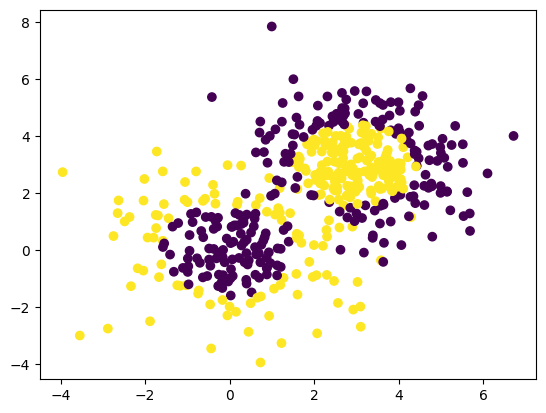

In [10]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [13]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4881 - loss: 0.6844 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5217 - loss: 0.6886 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 0.6855 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5203 - loss: 0.6821 - val_accuracy: 0.4300 - val_loss: 0.6934
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5300 - loss: 0.6877 - val_accuracy: 0.4300 - val_loss: 0.6935
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5326 - loss: 0.6842 - val_accuracy: 0.4300 - val_loss: 0.6934
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5379 - loss: 0.6857 - val_accuracy: 0.4300 - val_loss: 0.6935
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5438 - loss: 0.6783 - val_accuracy: 0.4300 - 

In [16]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4356 - loss: 0.7744 - val_accuracy: 0.4100 - val_loss: 0.7464
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4146 - loss: 0.7846 - val_accuracy: 0.4100 - val_loss: 0.7451
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4280 - loss: 0.7433 - val_accuracy: 0.4100 - val_loss: 0.7437
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4432 - loss: 0.7438 - val_accuracy: 0.4200 - val_loss: 0.7413
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4732 - loss: 0.7395 - val_accuracy: 0.4500 - val_loss: 0.7381
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4418 - loss: 0.7138 - val_accuracy: 0.4600 - val_loss: 0.7350
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4679 - loss: 0.6972 - val_accuracy: 0.4600 - val_loss: 0.7313
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4803 - loss: 0.7126 - val_accuracy: 0.4700 - 

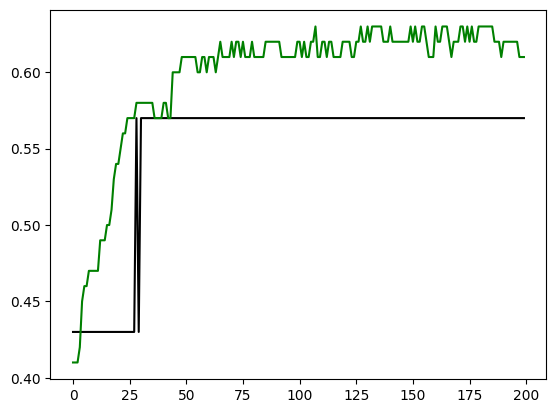

In [19]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')